# UNIVARIATE AND MULTIVARIATE ANALYSIS OF HABERMAN CANCER SURVIVAL DATASET


# Objective:

To find the survival chances of person who underwent a surgery for breast cancer.

# About Dataset:


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

you may download the dataset from (https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set)

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

1.Age of patient at time of operation (numerical)

2.Patient's year of operation (year - 1900, numerical)

3.Number of positive axillary nodes detected (numerical)

4.Survival status (class attribute):

    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("haberman.csv")
df


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [65]:
df.tail()


,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
df.shape


(306, 4)

In [6]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
df["status"].value_counts()

status
1    225
2     81
Name: count, dtype: int64

In [9]:
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

# SCATTER PLOT :

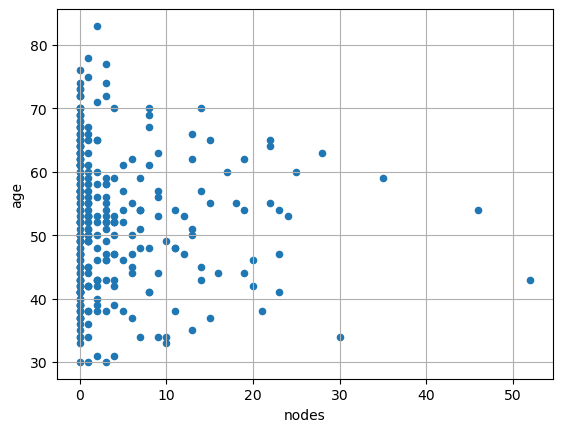

In [19]:
df.plot(kind='scatter', x='nodes', y='age') 
plt.grid()
plt.show()

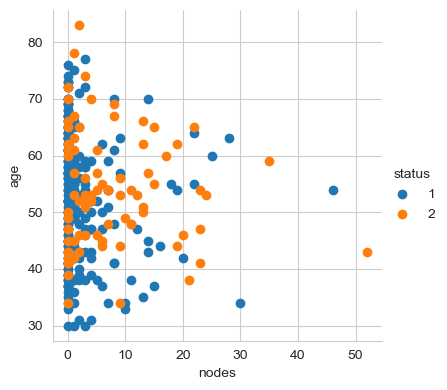

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue="status", height=4)
g.map(plt.scatter, "nodes", "age")
g.add_legend()

plt.show()


In the above snippet, functions from the seaborn library, such as FacetGrid, are imported to facilitate the distinction between data classifications. Blue dots represent survival of more than 5 years, while orange dots indicate survival of less than 5 years.


# Pair Plots

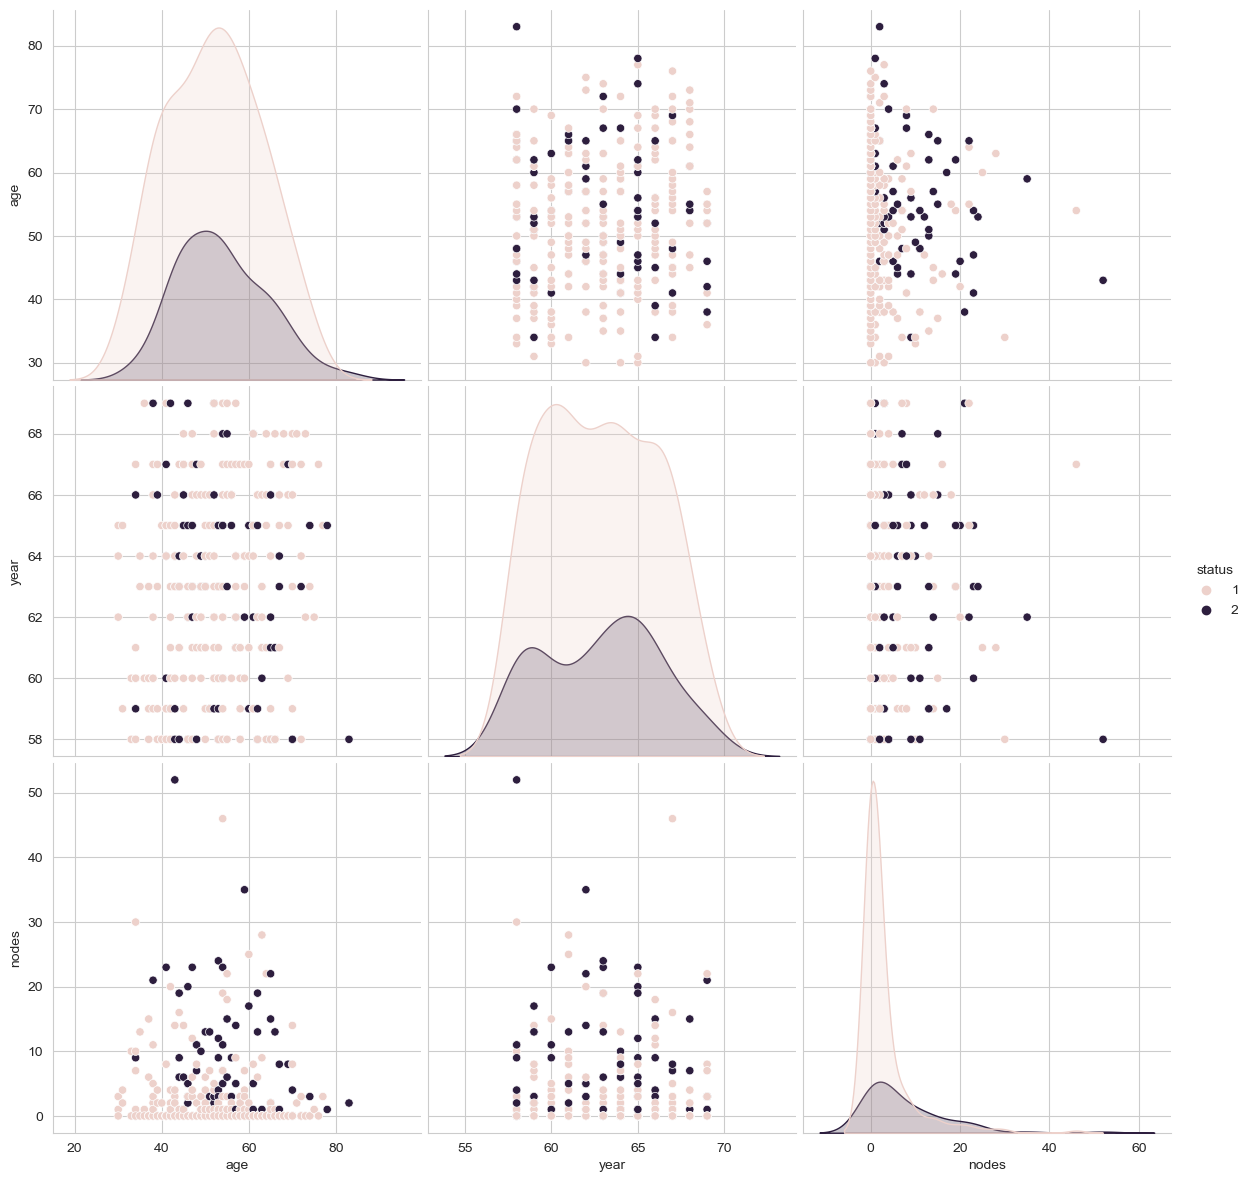

In [42]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",height=4)
plt.show()

At this point i will ignore plot 1,5,9 as  they are probability density plots which we will encounter at a later stage 
coming to the rest if the plots.

1.Plot 2: The points in this plot overlap each other too much and are indistinguishable hence i would have to reject this plot     for further analysis.

2.plot 3: The points are comparatively much more distinguishable from each other hence we would use this plot.

3.Plot 4: This plot is similar to plot 2 hence for similar reasons i would reject this plot for further analysis.

4.Plot 6: This plot also has the same problem of overlapping so rejected.

5.plot 7: The plot is much distinguishable and with low overlapping hence i would select this plot too for further analysis.

6.Plot 8: This is similar to plot 6 with a different axis hence rejected.

# 1-D Scatter Plot

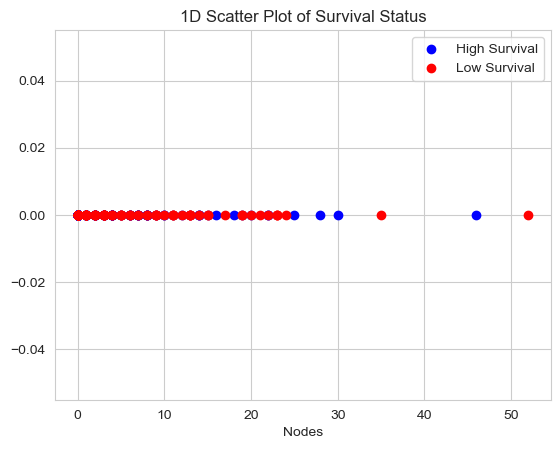

In [54]:
import matplotlib.pyplot as plt
import numpy as np

high_survival = df.loc[df["status"] == 1]
low_survival = df.loc[df["status"] == 2]

plt.scatter(high_survival["nodes"], np.zeros_like(high_survival["nodes"]), label='High Survival', color='blue')
plt.scatter(low_survival["nodes"], np.zeros_like(low_survival["nodes"]), label='Low Survival', color='red')

plt.xlabel('Nodes')
plt.title('1D Scatter Plot of Survival Status')
plt.legend()
plt.show()



The points overlap each other too much making the plot unreadable.

# Histogram and P.D.F(Probability Density Function)

P.D.F :- It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram.

C.D.F :-  It is representation of cumulative data of PDF ie. it will plot a graph by considering PDF for every data point cumulatively.


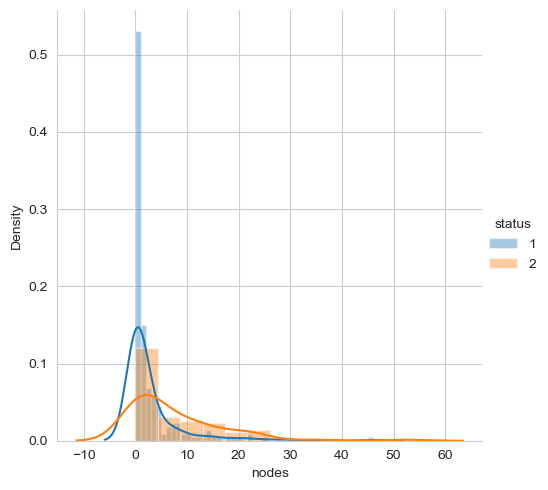

In [58]:
g=sns.FacetGrid(df,hue="status",height=5)
g.map(sns.distplot,"nodes")
g.add_legend()
plt.show()

In [ ]:
The blue and Orange smooth lines over the histogram bars is the probability density function.
The probability density function is found using K.D.E(Kernel Density function).

# Observation

 people survive long if they have less axillary nodes detected and vice versa 

# C.D.F(Cumulative Distribution Function)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


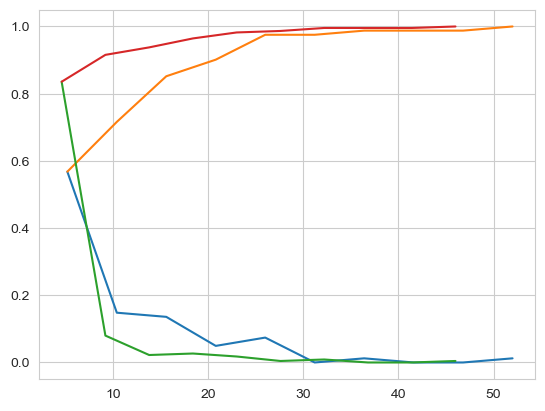

In [66]:
counts,bin_edges=np.histogram(low_survival["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(high_survival["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show()

The y axis says how much percentage of chances are there to not survive given the value of nodes present in the x axis 
the orange lines is for high survival while red line is for low survival

# Observation


1.84% of patients with less than 5 nodes have a high survival chance while 58%  of patients with less than 5 nodes have low survival chance

2.Patients with lower no.of nodes are more likely to survive longer while the more the number of nodes the lower will be the survival chances.

As the number of nodes increases, the orange line flattens earlier than the red line, indicating that long-surviving patients are less likely to have high node counts compared to short-surviving patients.

# Mean , Variance and Standard Deviation

In [67]:
print("MEAN")
print(np.mean(high_survival["nodes"]))
print(np.mean(low_survival["nodes"]))

print("MEDIAN")
print(np.median(high_survival["nodes"]))
print(np.median(low_survival["nodes"]))

print("STANDARD DEVIATION")
print(np.std(high_survival["nodes"]))
print(np.std(low_survival["nodes"]))

      

MEAN
2.7911111111111113
7.45679012345679
MEDIAN
0.0
4.0
STANDARD DEVIATION
5.857258449412131
9.128776076761632


# Observation

The median tell that on an avg the patients with 4 nodes have a low survival chance.
we are taking mean for average as median is less likely to be corrupted by one or two abnormal or false values than "mean"

# Percentiles and Quantiles

Percentiles are a type of quantiles, obtained adopting a subdivision into 100 groups. The 25th percentile is also known as the first quartile (Q1), the 50th percentile as the median or second quartile (Q2), and the 75th percentile as the third quartile (Q3).

In [69]:
print("PERCENTILE")
print(np.percentile(high_survival["nodes"],np.arange(0,100,25)))
print(np.percentile(low_survival["nodes"],np.arange(0,100,25)))
print(np.percentile(high_survival["nodes"],90))
print(np.percentile(low_survival["nodes"],90))

PERCENTILE
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
8.0
20.0


# Observation

1.75% of long suriving patients have less than 3 nodes.

2.90% of long surviving patients have less than 8 nodes.

3.90% of short surviving patients have less than 20 nodes.

# BOX PLOT , VIOLIN PLOT AND CONTOUR PLOT

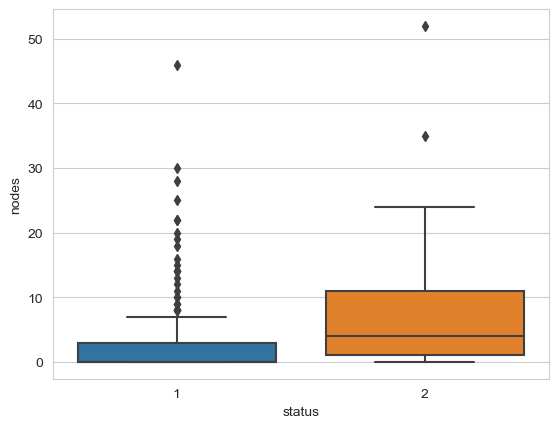

In [70]:
sns.boxplot(x="status",y="nodes", data=df)
plt.show()

In the box plot the mid line represents 50th percentile , the bottom line represent 25th percentile and the top edge represents the 75th percentile.
The straight verticle lines are called whiskers. Whiskers have no standard way of definition,in seaborn it is defined as 1.5 * IQR(inter quartile range).

# Observation

The 50th and 25th percentile is same for long surviving patients i.e 0 while the 75th percentile is at value 7 (nodes)
On the other hand the 25th percentile for low survivng patients is at 3 nodes and 75th percentile at 11 nodes.


VIOLIN PLOT : This plot is used to present PDF and Box plots both, it combines the benefit of both the plots and simplifies them

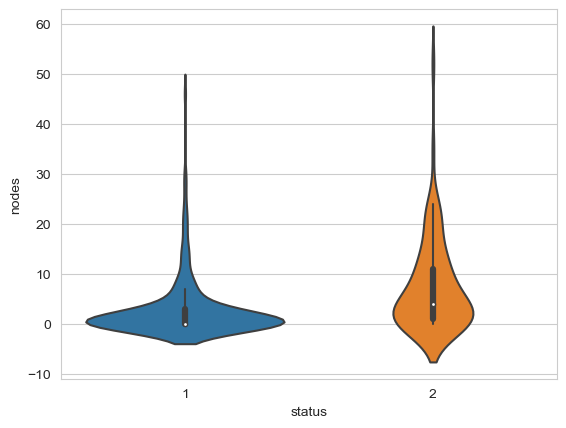

In [71]:
sns.violinplot(x="status", y="nodes",data=df)
plt.legend
plt.show()

The denser region means more number of patients in that range while sparser regions means a lower number of patients in that range.

# Observation

For the plot of low surviving patients the plot is thicker at 10 to 20 number of nodes compared to the counterpart

Contour plots are like density plot means if the number of data is more on specific point that area will get darker and if you visualise it will make hill like structure where hill top has maximum density of point and density decreases as hill slope getting decreases.

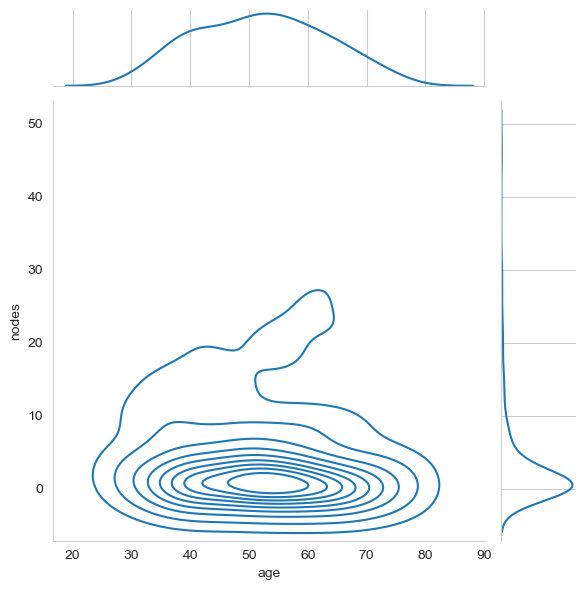

In [74]:
sns.jointplot(x="age",y="nodes",data=high_survival,kind="kde")
plt.grid()
plt.show()

# Observation

In [ ]:
The patients in the age bracket of 47 to 60 and with 0 to 3 nodes have high survival channces than rest.

# Conclusion

According to all the observations and analysing techniques used in the above exploratory data analysis we can conclude that the given dataset is reliable enough to figure the survival chances of a cancer patient using his or her age and number of nodes.